# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


In [690]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [691]:
DATA_PATH = "/content/drive/MyDrive/Datasets/"

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [692]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# 2. Loading and Cleaning with Pandas

In [693]:
traindf = pd.read_csv(DATA_PATH+'/train-data.csv')
traindf.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [694]:
traindf.describe()

Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000

In [695]:
testdf = pd.read_csv(DATA_PATH+'/test-data.csv')
testdf.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [696]:
traindf = traindf.drop(['Unnamed: 0'],axis=1)
testdf = testdf.drop(['Unnamed: 0'],axis=1)
traindf.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [697]:
print(traindf.shape)
print(testdf.shape)

(6019, 13)
(1234, 12)


In [698]:
 traindf.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [699]:
# Drop null values from Mileage
traindf.dropna(subset=['Mileage'],inplace =True)

In [700]:
# Drop null values from Engine
traindf.dropna(subset=['Engine'],inplace =True)

In [701]:
# Drop null values from Power
traindf.dropna(subset=['Power'],inplace =True)

In [702]:
# Drop null values from Seats
traindf.dropna(subset=['Seats'],inplace =True)

In [703]:
# Drop the New_Price column
traindf = traindf.drop('New_Price',axis=1)

In [704]:
 traindf.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [705]:
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [706]:
# The data type of Mileage is an object, I will convert it into a float value

mileage = [float(mileage.split(" ")[0]) for mileage in traindf.Mileage]
traindf['Mileage'] = mileage
traindf.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage   Engine      Power  Seats  Price  
0       CNG       Manual      First    26.60   998 CC  58.16 bhp    5.0   1.75  
1    Diesel       Manual      First    19.67  1582 CC  126.2 bhp    5.0  12.50  
2    Petrol       Manual      First    18.20  1199 CC   88.7 bhp    5.0   4.50  
3    Diesel       Manual      First    20.77  1248 CC  88.76 bhp    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968 CC  140.8 bhp    5.0  17.74

In [707]:
# Similarly for the Engine, since it is an object dtype
engine = [float(str(engine).split(" ")[0]) for engine in traindf.Engine]
traindf['Engine'] = engine
traindf.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine      Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0  58.16 bhp    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.2 bhp    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.7 bhp    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0  88.76 bhp    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.8 bhp    5.0  17.74

In [708]:
traindf.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [709]:
power = [power.replace("null", '0') for power in traindf.Power]
traindf['Power'] = power
# df.head()


In [710]:
# Also Change the dtype of Power
pd.to_numeric(traindf['Power'], errors='coerce')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6014   NaN
6015   NaN
6016   NaN
6017   NaN
6018   NaN
Name: Power, Length: 5975, dtype: float64

In [711]:
power = [float(power.split(" ")[0]) for power in traindf.Power]
traindf['Power'] = power
traindf.head()


Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74

In [712]:
# Get the count of different value of Transmission 
traindf.Transmission.value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

In [713]:
# Convert the Transmission values to 1 or 0. If the Transmission is Manual give a value = 1, for Automatic give value = 0
def get_transmission(value):
    if value == 'Manual':
        return 1
    else:
        return 0


In [714]:
traindf.Transmission = traindf.Transmission.map(get_transmission)
traindf.head(10)

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
5      Hyundai EON LPG Era Plus Option   Hyderabad  2012              75000   
6               Nissan Micra Diesel XV      Jaipur  2013              86999   
7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016              36000   
8  Volkswagen Vento Diesel Comfortline        Pune  2013              64430   
9       Tata Indica Vista Quadrajet LS     Chennai  2012              65932   

  Fuel_Type  Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG             1      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel             1      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol             1      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel             1      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel             0     Second    15.20  1968.0  140.80    5.0  17.74  
5       LPG             1      First    21.10   814.0   55.20    5.0   2.35  
6    Diesel             1      First    23.08  1461.0   63.10    5.0   3.50  
7    Diesel             0      First    11.36  2755.0  171.50    8.0  17.50  
8    Diesel             1      First    20.54  1598.0  103.60    5.0   5.20  
9    Diesel             1     Second    22.30  1248.0   74.00    5.0   1.95

In [715]:
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission           int64
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [716]:
# Give a category 
traindf.Fuel_Type.value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [717]:
testdf.isna().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

# 3.  EDA and Visualization

Most common second hand cars

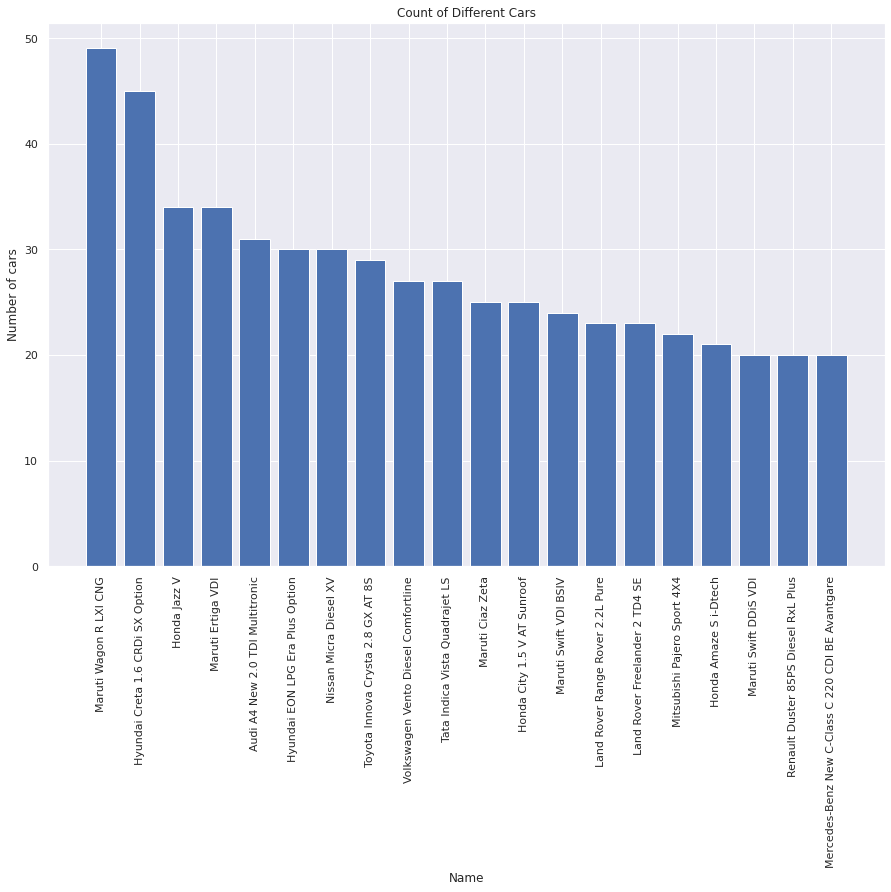

In [718]:
# Visualize different cars and the value counts
x = traindf.Name.unique()[:20]
y = traindf.Name.value_counts()[:20]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of Different Cars')
plt.xlabel('Name')
plt.ylabel('Number of cars')
plt.xticks(rotation=90)
plt.show()

**Most used Fuel types**

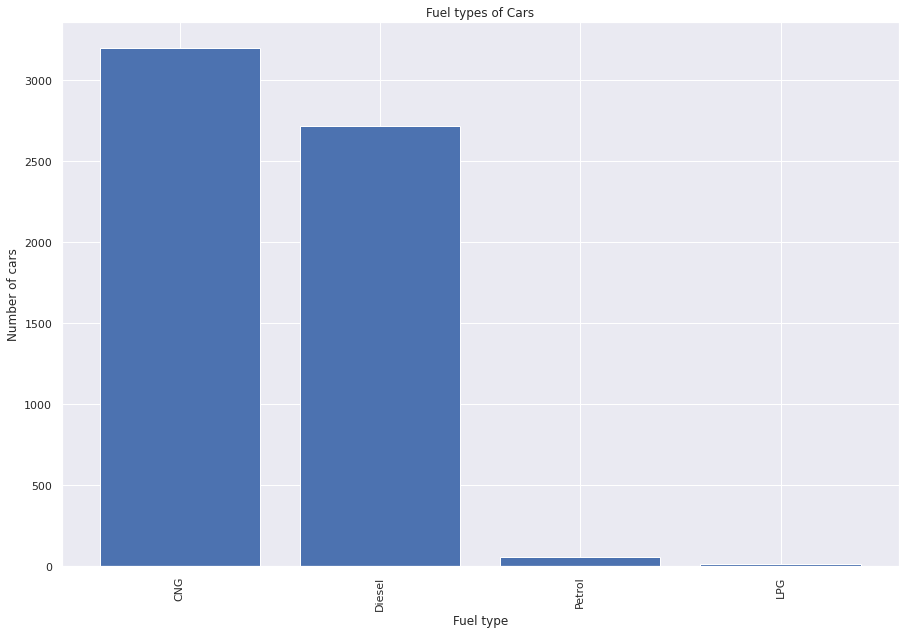

In [719]:
# Visualize different fuel type and the value counts
x = traindf.Fuel_Type.unique()
y = traindf.Fuel_Type.value_counts()

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Fuel types of Cars')
plt.xlabel('Fuel type')
plt.ylabel('Number of cars')
plt.xticks(rotation=90)
plt.show()

**Most Owner Types**

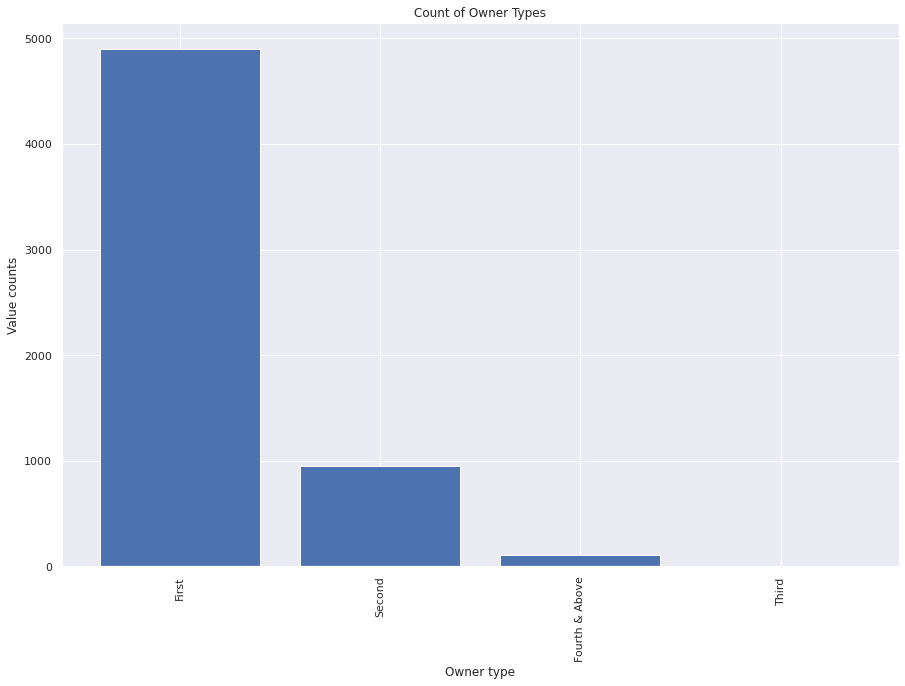

In [720]:
# Owner type an counts
x = traindf.Owner_Type.unique()[:20]
y = traindf.Owner_Type.value_counts()[:20]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of Owner Types')
plt.xlabel('Owner type')
plt.ylabel('Value counts')
plt.xticks(rotation=90)
plt.show()

**Most Fuel Price Ranges**

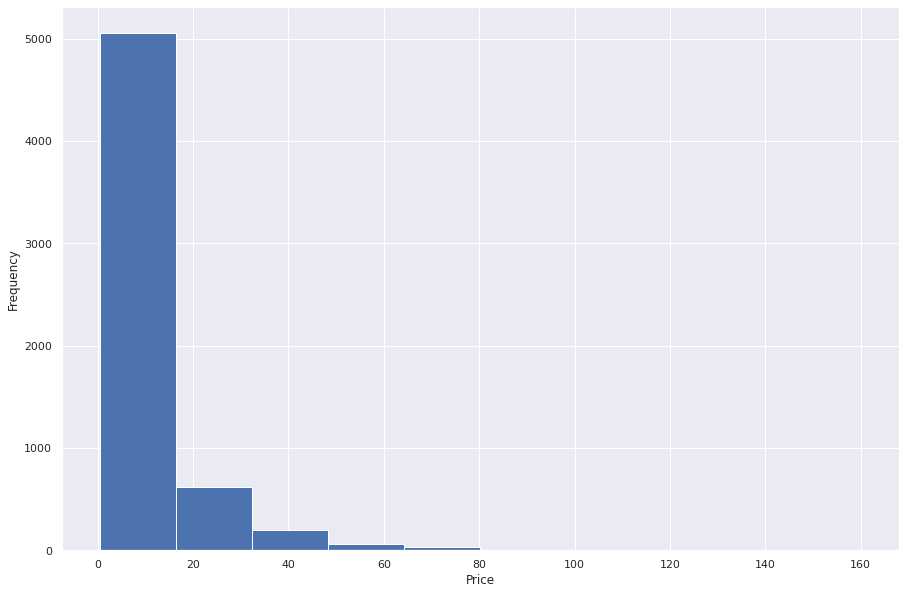

In [721]:
# plot histogram of Price

x = traindf.Price

sns.set(rc={'figure.figsize':(15,10)})
plt.hist(x)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


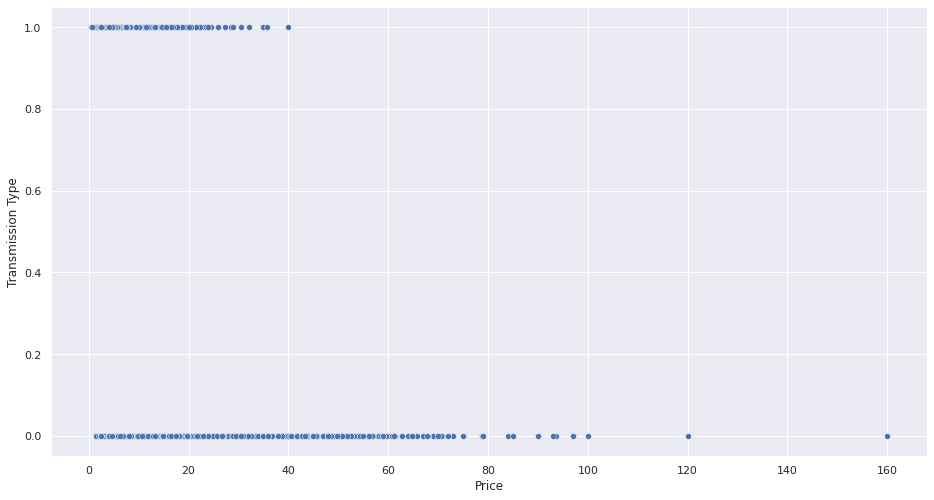

In [722]:
# Plot of Transmission type vs Price

sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = traindf,x = 'Price',y = 'Transmission')
plt.xlabel("Price")
plt.ylabel("Transmission Type")
plt.show()

In [723]:

# A high correlation can help us use dimension reduction, I will try to see the correlations
corr = traindf.corr() 
corr

Year  Kilometers_Driven  Transmission   Mileage  \
Year               1.000000          -0.172663     -0.095812  0.314417   
Kilometers_Driven -0.172663           1.000000      0.025870 -0.064991   
Transmission      -0.095812           0.025870      1.000000  0.342504   
Mileage            0.314417          -0.064991      0.342504  1.000000   
Engine            -0.052538           0.090832     -0.501056 -0.598638   
Power              0.069787           0.024375     -0.635513 -0.453399   
Seats              0.012338           0.083101      0.075325 -0.308226   
Price              0.305800          -0.011263     -0.586075 -0.313877   

                     Engine     Power     Seats     Price  
Year              -0.052538  0.069787  0.012338  0.305800  
Kilometers_Driven  0.090832  0.024375  0.083101 -0.011263  
Transmission      -0.501056 -0.635513  0.075325 -0.586075  
Mileage           -0.598638 -0.453399 -0.308226 -0.313877  
Engine             1.000000  0.842507  0.393435  0.659117  
Power              0.842507  1.000000  0.108638  0.759749  
Seats              0.393435  0.108638  1.000000  0.052262  
Price              0.659117  0.759749  0.052262  1.000000

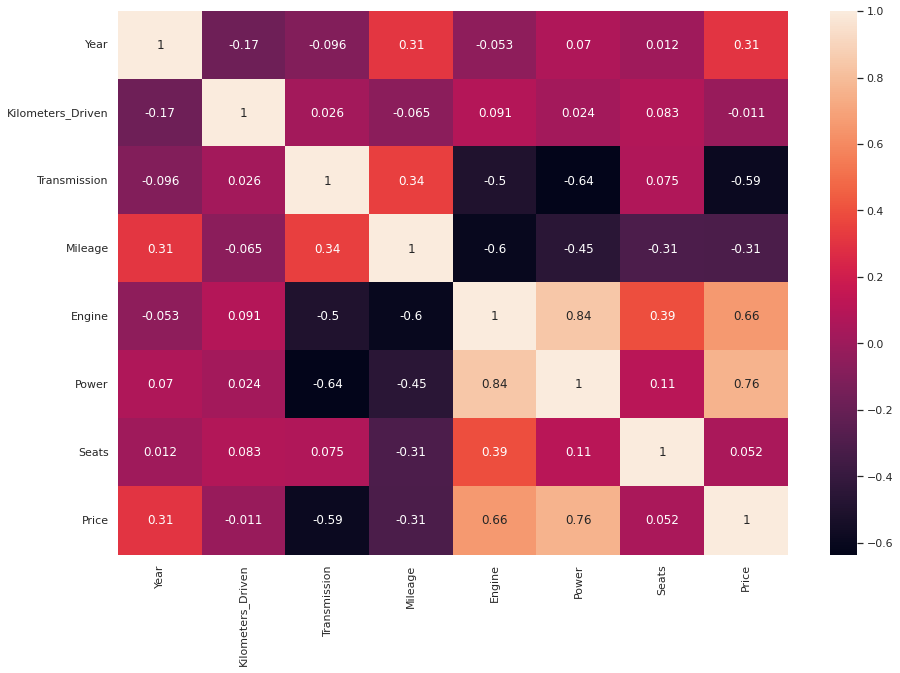

In [724]:
# visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

# 4. Feature Engineering 

 ## 4.1. Outlier Detection

---



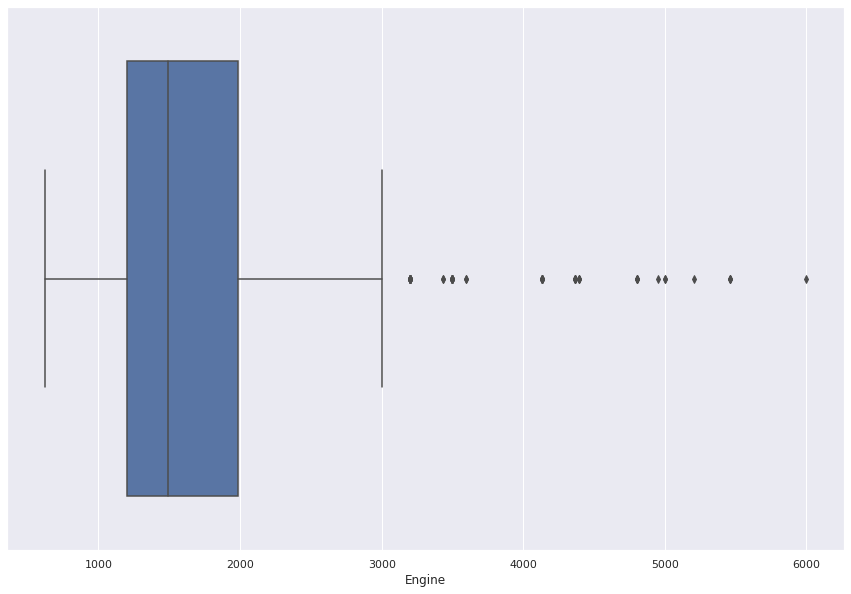

In [725]:
# ploting boxplot to check outliers
sns.boxplot(x=traindf['Engine'])
plt.show()

In [726]:
# calculating IQR and upper limit and lower limit to find outliers
Q1 = traindf.Engine.quantile(0.25)
Q3 = traindf.Engine.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [727]:
# checking outlier
traindf[(traindf.Engine < lowerlimit)  | (traindf.Engine > upperlimit)]

Name    Location  Year  \
70                Porsche Cayenne 2009-2014 Turbo      Mumbai  2008   
152         Mercedes-Benz S Class 2005 2013 S 500     Kolkata  2010   
459            Audi Q7 4.2 TDI Quattro Technology  Coimbatore  2016   
586            Audi Q7 4.2 TDI Quattro Technology       Kochi  2014   
589       Mercedes-Benz S Class 2005 2013 S 350 L   Bangalore  2006   
...                                           ...         ...   ...   
5728  Mercedes-Benz E-Class 2009-2013 E350 Petrol     Kolkata  2009   
5781                   Lamborghini Gallardo Coupe       Delhi  2011   
5885       Mercedes-Benz R-Class R350 4Matic Long        Pune  2010   
5919                       Jaguar F Type 5.0 V8 S   Hyderabad  2015   
6011                      Skoda Superb 3.6 V6 FSI   Hyderabad  2009   

      Kilometers_Driven Fuel_Type  Transmission Owner_Type  Mileage  Engine  \
70                73000    Petrol             0      First     8.50  4806.0   
152               35277    Petrol             0      First     7.81  5461.0   
459               51002    Diesel             0      First    11.33  4134.0   
586               79926    Diesel             0      First    11.33  4134.0   
589               47088    Petrol             0     Second    10.13  3498.0   
...                 ...       ...           ...        ...      ...     ...   
5728              43600    Petrol             0      First    10.93  3498.0   
5781               6500    Petrol             0      Third     6.40  5204.0   
5885              93000    Petrol             0     Second    11.80  3498.0   
5919               8000    Petrol             0      First    12.50  5000.0   
6011              53000    Petrol             0      First     0.00  3597.0   

      Power  Seats   Price  
70    500.0    5.0   14.50  
152   362.9    5.0   30.00  
459   335.2    7.0   48.91  
586   335.2    7.0   29.77  
589   364.9    5.0   19.00  
...     ...    ...     ...  
5728  272.0    5.0   10.24  
5781  560.0    2.0  120.00  
5885  272.0    7.0   15.00  
5919  488.1    2.0  100.00  
6011  262.6    5.0    4.75  

[61 rows x 12 columns]

In [728]:
# Drop all the rows containing height beyond lower and upper limit.
traindf1 =traindf[(traindf.Engine > lowerlimit) & (traindf.Engine < upperlimit)]
traindf1.shape

(5914, 12)

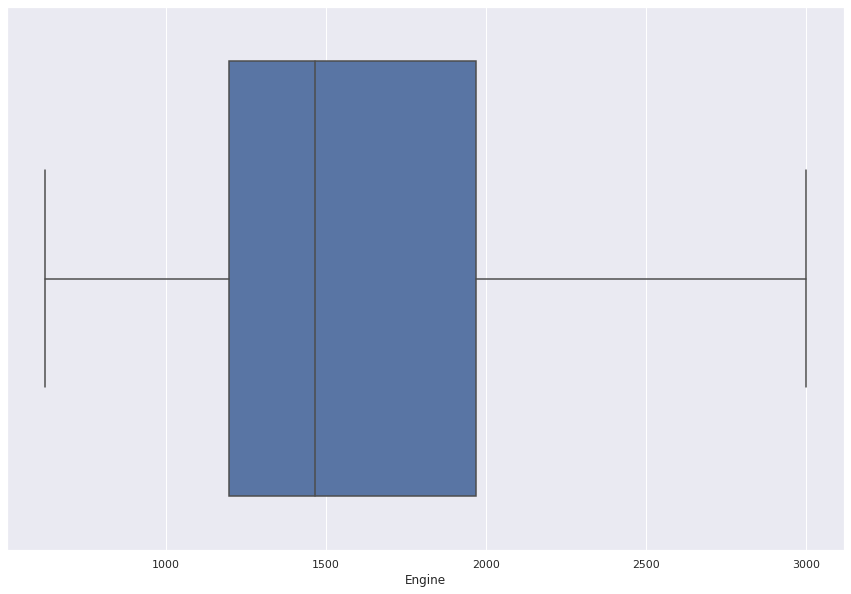

In [729]:
# ploting boxplot to check outliers are removed or not
sns.boxplot(x=traindf1['Engine'])
plt.show()

 ## 4.2. Transformation

---



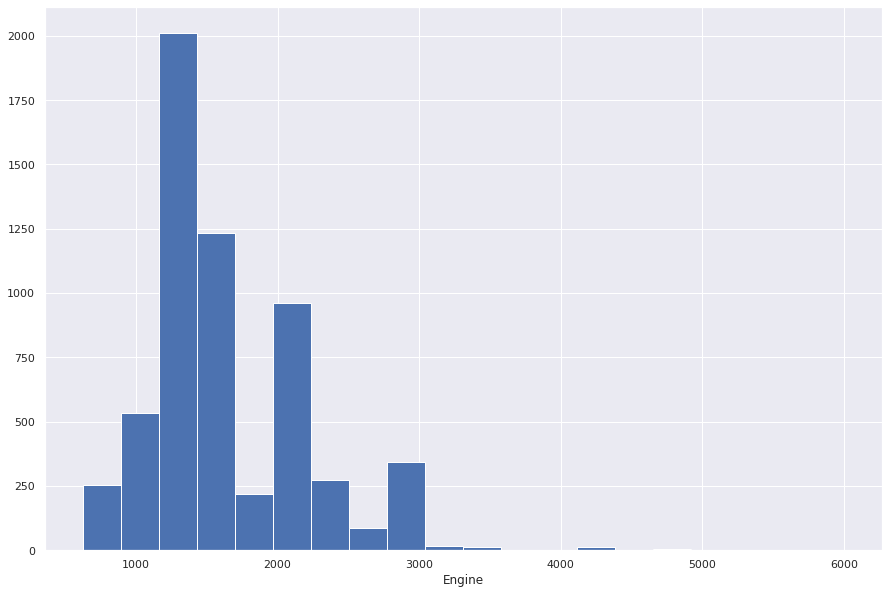

In [730]:
plt.hist(traindf.Engine,bins=20)
plt.xlabel("Engine")
plt.show()

**Square root Transformation**

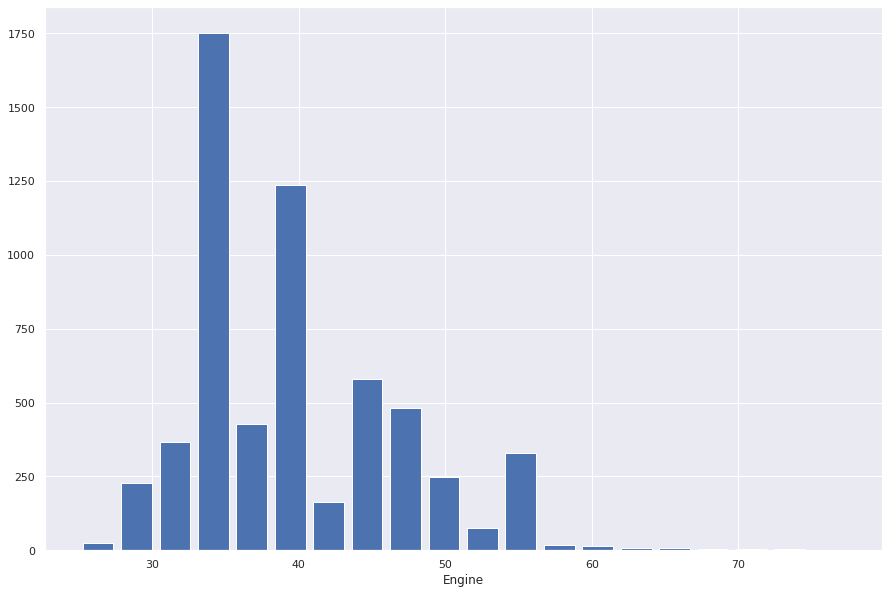

In [731]:
# x = loandf.LoanAmount ** (1/2)
x = np.sqrt(traindf.Engine)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Engine")
plt.show()

## 4.3. Feature Scaling

---



**3.1. MinMax Scaler**

In [732]:
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission           int64
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [733]:
numeric_columns = ['Year','Kilometers_Driven','Transmission','Mileage', 'Engine', 'Power', 'Seats', 'Price']
numericdf = traindf[numeric_columns]

In [734]:
numericdf.isna().sum()

Year                 0
Kilometers_Driven    0
Transmission         0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [735]:
# Dataframe before scaling
numericdf.head()

Year  Kilometers_Driven  Transmission  Mileage  Engine   Power  Seats  \
0  2010              72000             1    26.60   998.0   58.16    5.0   
1  2015              41000             1    19.67  1582.0  126.20    5.0   
2  2011              46000             1    18.20  1199.0   88.70    5.0   
3  2012              87000             1    20.77  1248.0   88.76    7.0   
4  2013              40670             0    15.20  1968.0  140.80    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [736]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [737]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

Year  Kilometers_Driven  Transmission   Mileage    Engine     Power  \
0  0.571429           0.011051           1.0  0.793083  0.069594  0.103857   
1  0.809524           0.006282           1.0  0.586464  0.178266  0.225357   
2  0.619048           0.007051           1.0  0.542636  0.106997  0.158393   
3  0.666667           0.013359           1.0  0.619261  0.116115  0.158500   
4  0.714286           0.006231           0.0  0.453190  0.250093  0.251429   

   Seats     Price  
0    0.5  0.008210  
1    0.5  0.075583  
2    0.5  0.025445  
3    0.7  0.034846  
4    0.5  0.108423

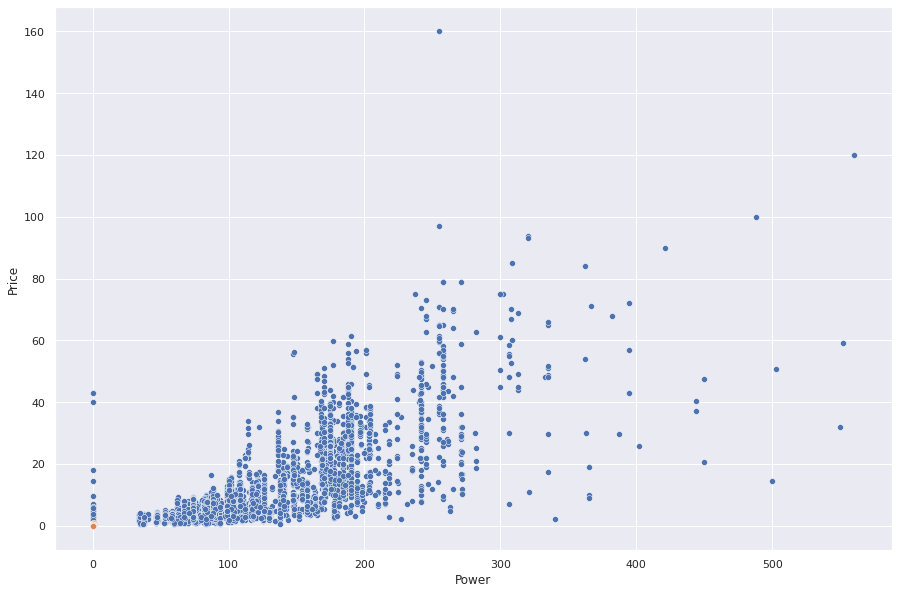

In [738]:
sns.set(rc={'figure.figsize':(15,10)})

sns.scatterplot(data=traindf,x='Power',y='Price')
sns.scatterplot(data = transformdf,x='Engine',y='Price')
plt.show()

 ## 4.4. Encoding Categorical variables

---



In [739]:
traindf.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type  Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG             1      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel             1      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol             1      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel             1      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel             0     Second    15.20  1968.0  140.80    5.0  17.74

**One-Hot Encoding**

In [740]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Fuel_Type' column 
encoder_df = pd.DataFrame(encoder.fit_transform(traindf[['Fuel_Type']]).toarray())
encoder_df.columns = ['CNG', 'DIESEL', 'PETROL', 'LPG']


#merge one-hot encoded columns back with transformdf DataFrame
transformdf = transformdf.join(encoder_df)

#view final df
transformdf.head()

Year  Kilometers_Driven  Transmission   Mileage    Engine     Power  \
0  0.571429           0.011051           1.0  0.793083  0.069594  0.103857   
1  0.809524           0.006282           1.0  0.586464  0.178266  0.225357   
2  0.619048           0.007051           1.0  0.542636  0.106997  0.158393   
3  0.666667           0.013359           1.0  0.619261  0.116115  0.158500   
4  0.714286           0.006231           0.0  0.453190  0.250093  0.251429   

   Seats     Price  CNG  DIESEL  PETROL  LPG  
0    0.5  0.008210  1.0     0.0     0.0  0.0  
1    0.5  0.075583  0.0     1.0     0.0  0.0  
2    0.5  0.025445  0.0     0.0     0.0  1.0  
3    0.7  0.034846  0.0     1.0     0.0  0.0  
4    0.5  0.108423  0.0     1.0     0.0  0.0

**Ordinal Encoder (Ordinal data)**
- for Owner_Type

In [741]:

ownerdf = traindf[['Owner_Type']]

from sklearn.preprocessing import OrdinalEncoder
oe =  OrdinalEncoder()
ownerdf['Owner_Type'] = oe.fit_transform(traindf[['Owner_Type']])
ownerdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Owner_Type
0         0.0
1         0.0
2         0.0
3         0.0
4         2.0

In [742]:
transformdf = transformdf.join(ownerdf)
transformdf.head()

Year  Kilometers_Driven  Transmission   Mileage    Engine     Power  \
0  0.571429           0.011051           1.0  0.793083  0.069594  0.103857   
1  0.809524           0.006282           1.0  0.586464  0.178266  0.225357   
2  0.619048           0.007051           1.0  0.542636  0.106997  0.158393   
3  0.666667           0.013359           1.0  0.619261  0.116115  0.158500   
4  0.714286           0.006231           0.0  0.453190  0.250093  0.251429   

   Seats     Price  CNG  DIESEL  PETROL  LPG  Owner_Type  
0    0.5  0.008210  1.0     0.0     0.0  0.0         0.0  
1    0.5  0.075583  0.0     1.0     0.0  0.0         0.0  
2    0.5  0.025445  0.0     0.0     0.0  1.0         0.0  
3    0.7  0.034846  0.0     1.0     0.0  0.0         0.0  
4    0.5  0.108423  0.0     1.0     0.0  0.0         2.0

 ## 4.5. Feature Selection

---



**Univariate feature selection using SelectKBest**

In [743]:
# All the numerical columns
traincols = ['Year','Kilometers_Driven', 'CNG',	'DIESEL',	'PETROL', 'LPG', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
traindf = transformdf[traincols]
traindf.head()

Year  Kilometers_Driven  CNG  DIESEL  PETROL  LPG  Transmission  \
0  0.571429           0.011051  1.0     0.0     0.0  0.0           1.0   
1  0.809524           0.006282  0.0     1.0     0.0  0.0           1.0   
2  0.619048           0.007051  0.0     0.0     0.0  1.0           1.0   
3  0.666667           0.013359  0.0     1.0     0.0  0.0           1.0   
4  0.714286           0.006231  0.0     1.0     0.0  0.0           0.0   

   Owner_Type   Mileage    Engine     Power  Seats     Price  
0         0.0  0.793083  0.069594  0.103857    0.5  0.008210  
1         0.0  0.586464  0.178266  0.225357    0.5  0.075583  
2         0.0  0.542636  0.106997  0.158393    0.5  0.025445  
3         0.0  0.619261  0.116115  0.158500    0.7  0.034846  
4         2.0  0.453190  0.250093  0.251429    0.5  0.108423

In [744]:
# Check the null values for the new dataframe
traindf.isna().sum()

Year                  0
Kilometers_Driven     0
CNG                   0
DIESEL                0
PETROL                0
LPG                   0
Transmission          0
Owner_Type           44
Mileage               0
Engine                0
Power                 0
Seats                 0
Price                 0
dtype: int64

In [745]:
# Drop null values from Owner_Type
traindf.dropna(subset=['Owner_Type'],inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [746]:
traindf.isna().sum()


Year                 0
Kilometers_Driven    0
CNG                  0
DIESEL               0
PETROL               0
LPG                  0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [747]:
# Selecting X by dropping Price
X = traindf.drop(['Price'],axis=1)

# target feature
y = traindf.Price

In [748]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [749]:
# A high correlation can help us use dimension reduction, I will try to see the correlations
corr = traindf.corr() 
corr

Year  Kilometers_Driven       CNG    DIESEL    PETROL  \
Year               1.000000          -0.172346  0.018351  0.121836 -0.031324   
Kilometers_Driven -0.172346           1.000000 -0.003436  0.104047  0.002573   
CNG                0.018351          -0.003436  1.000000 -0.104613 -0.003806   
DIESEL             0.121836           0.104047 -0.104613  1.000000 -0.041772   
PETROL            -0.031324           0.002573 -0.003806 -0.041772  1.000000   
LPG               -0.123166          -0.103764 -0.089128 -0.978181 -0.035589   
Transmission      -0.096903           0.025786  0.061784 -0.140274  0.024670   
Owner_Type        -0.020819           0.003627  0.006404  0.016925  0.013954   
Mileage            0.313983          -0.064742  0.156222  0.108600  0.016054   
Engine            -0.050853           0.089852 -0.086064  0.426856 -0.038914   
Power              0.071107           0.023714 -0.083834  0.287069 -0.036285   
Seats              0.012793           0.082730 -0.029177  0.308021 -0.013373   
Price              0.306219          -0.011348 -0.052150  0.319195 -0.024634   

                        LPG  Transmission  Owner_Type   Mileage    Engine  \
Year              -0.123166     -0.096903   -0.020819  0.313983 -0.050853   
Kilometers_Driven -0.103764      0.025786    0.003627 -0.064742  0.089852   
CNG               -0.089128      0.061784    0.006404  0.156222 -0.086064   
DIESEL            -0.978181     -0.140274    0.016925  0.108600  0.426856   
PETROL            -0.035589      0.024670    0.013954  0.016054 -0.038914   
LPG                1.000000      0.126593   -0.019290 -0.140389 -0.407852   
Transmission       0.126593      1.000000    0.000115  0.343863 -0.503357   
Owner_Type        -0.019290      0.000115    1.000000 -0.005766  0.007481   
Mileage           -0.140389      0.343863   -0.005766  1.000000 -0.598690   
Engine            -0.407852     -0.503357    0.007481 -0.598690  1.000000   
Power             -0.268456     -0.636831   -0.000374 -0.453767  0.842796   
Seats             -0.301852      0.073936    0.009289 -0.306888  0.391863   
Price             -0.307704     -0.587531   -0.007302 -0.314617  0.660049   

                      Power     Seats     Price  
Year               0.071107  0.012793  0.306219  
Kilometers_Driven  0.023714  0.082730 -0.011348  
CNG               -0.083834 -0.029177 -0.052150  
DIESEL             0.287069  0.308021  0.319195  
PETROL            -0.036285 -0.013373 -0.024634  
LPG               -0.268456 -0.301852 -0.307704  
Transmission      -0.636831  0.073936 -0.587531  
Owner_Type        -0.000374  0.009289 -0.007302  
Mileage           -0.453767 -0.306888 -0.314617  
Engine             0.842796  0.391863  0.660049  
Power              1.000000  0.107730  0.760005  
Seats              0.107730  1.000000  0.051930  
Price              0.760005  0.051930  1.000000

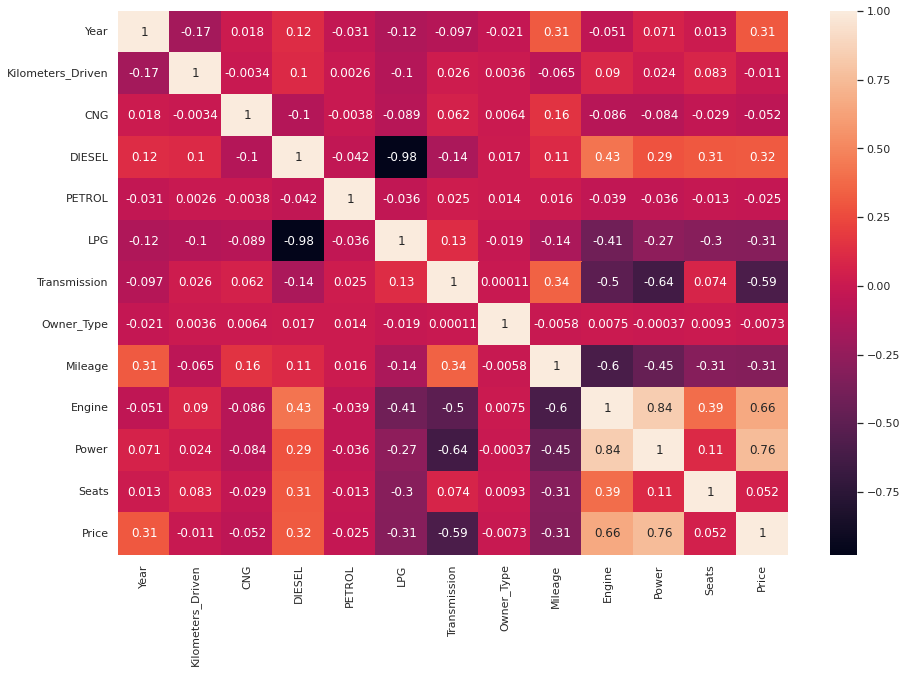

In [750]:
# visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

In [751]:
# From the above, columns with strong correlation to Price 
columns = ['Year', 'Diesel', 'LPG', 'Transmission', 'Mileage', 'Engine', 'Power']

In [752]:
# def correlation_matrix(dataset,threshold):
#     col_corr = set()
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j]) > threshold:
#                 colname = corr_matrix.columns[i]
#                 col_corr.add(colname)
#     return col_corr

In [753]:
# corr_features = correlation_matrix(traindf,0.5)
# corr_features

# 5. Training Model

In [754]:
#create instance of LinearRegression
model = LinearRegression()
model

LinearRegression()

In [755]:
model.fit(X_train, y_train)

LinearRegression()

In [756]:
model.coef_

array([ 1.15755720e-01, -9.55072088e-01,  5.33526962e-03,  2.21650580e-03,
        1.03538089e-02, -1.79055843e-02, -1.69767493e-02, -8.50545732e-04,
       -6.44262285e-02,  1.14837441e-01,  3.12320451e-01, -1.15868671e-01])

In [757]:
model.intercept_

0.012696422545233961

# 6. Prediction

In [758]:
y_pred = model.predict(X_test)
y_pred

array([0.00822544, 0.14479645, 0.14195301, ..., 0.00222648, 0.04943712,
       0.01939728])

# 7. Evaluating your Model

In [759]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.02407547743515819
Mean Squared Error: 0.0024356749247446082
Root Mean Squared Error: 0.04935255742861365
R2 score : 0.465756


In [760]:

Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_test)

print("Accuracy on train data: ",r2_score(y_train,Y_train_predicted))
print("Accuracy on test set: ",r2_score(y_test,Y_test_predicted))

Accuracy on train data:  0.6832606132360592
Accuracy on test set:  0.4657555137925611


In [761]:
# Similarly with score function
# training score
model.score(X_train, y_train)


0.6832606132360592

In [762]:
# test score
model.score(X_test, y_test)


0.4657555137925611

In [763]:
Result = pd.DataFrame({"Actual Price":y_test,"Predicted Price":Y_test_predicted})
Result.head(10)

Actual Price  Predicted Price
5928      0.005954         0.008225
354       0.168338         0.144796
5708      0.135122         0.141953
3161      0.031712         0.033176
5627      0.037979         0.029476
3406      0.023001         0.027196
3886      0.046440         0.012384
5874      0.047380         0.049154
1838      0.118889         0.082915
2343      0.024505         0.063852

**Training using the X_selected by KBest for the traing data**

In [821]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
fs = SelectKBest(score_func=f_regression,k=8)

#apply feature selection on X_train
X_selected = fs.fit_transform(X_train,y_train)

In [822]:
X_selected.shape

(4744, 8)

In [823]:
modelk = LinearRegression()

modelk.fit(X_selected, y_train)

LinearRegression()

**Score of Model trained using KBest feature selection**

In [824]:
# Training score
modelk.score(X_selected, y_train)


0.6726429387020249

In [825]:

X_selected = fs.fit_transform(X_test, y_test)
X_selected[0]


array([0.47619048, 0.00997395, 0.        , 1.        , 1.        ,
       0.        , 0.08596948, 0.11071429])

In [826]:
X_selected.shape


(1187, 8)

In [827]:
modelk.fit(X_selected, y_test)


LinearRegression()

In [828]:
# test score
modelk.score(X_selected, y_test)


0.697391246568335

# SUBMISSION DATE: 2nd April 2022